In [11]:
# basic operation
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for modelling
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM


# to avoid warnings?
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# provide path
import os
print(os.listdir('../data'))




['uci-secom.csv']


## Reading the Data and understanding the attributes

In [12]:
# read data
data = pd.read_csv('../data/uci-secom.csv')

print(data.shape)

(1567, 592)


In [13]:
# overview the data
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [21]:
# Check if dataset has NULL values

# data.isnull().sum()
data.isnull().any().any()

np.True_

In [23]:
# Replace all the NaN Values with 0 as values
# since, the values are not present that means the value are not available or calculated
# Absence of a signal is assumed to be no signal in dataset
# so better not take median or mean

data = data.replace(np.nan, 0)

data.isnull().any().any()

np.False_

## Data Visualization

In [29]:
# data['Pass/Fail'].unique()
unique_vals = data['Pass/Fail'].unique() # array([-1,  1])
targets = [data.loc[data['Pass/Fail'] == val ] for val in unique_vals]

C:\Users\maizz\AppData\Local\Temp\ipykernel_25180\1566606281.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target['1'], hist=True, rug=True)
C:\Users\maizz\AppData\Local\Temp\ipykernel_25180\1566606281.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target['1'], hist=True, rug=True)
C:

Text(0.5, 1.0, 'Fourth Sensor Measurements')

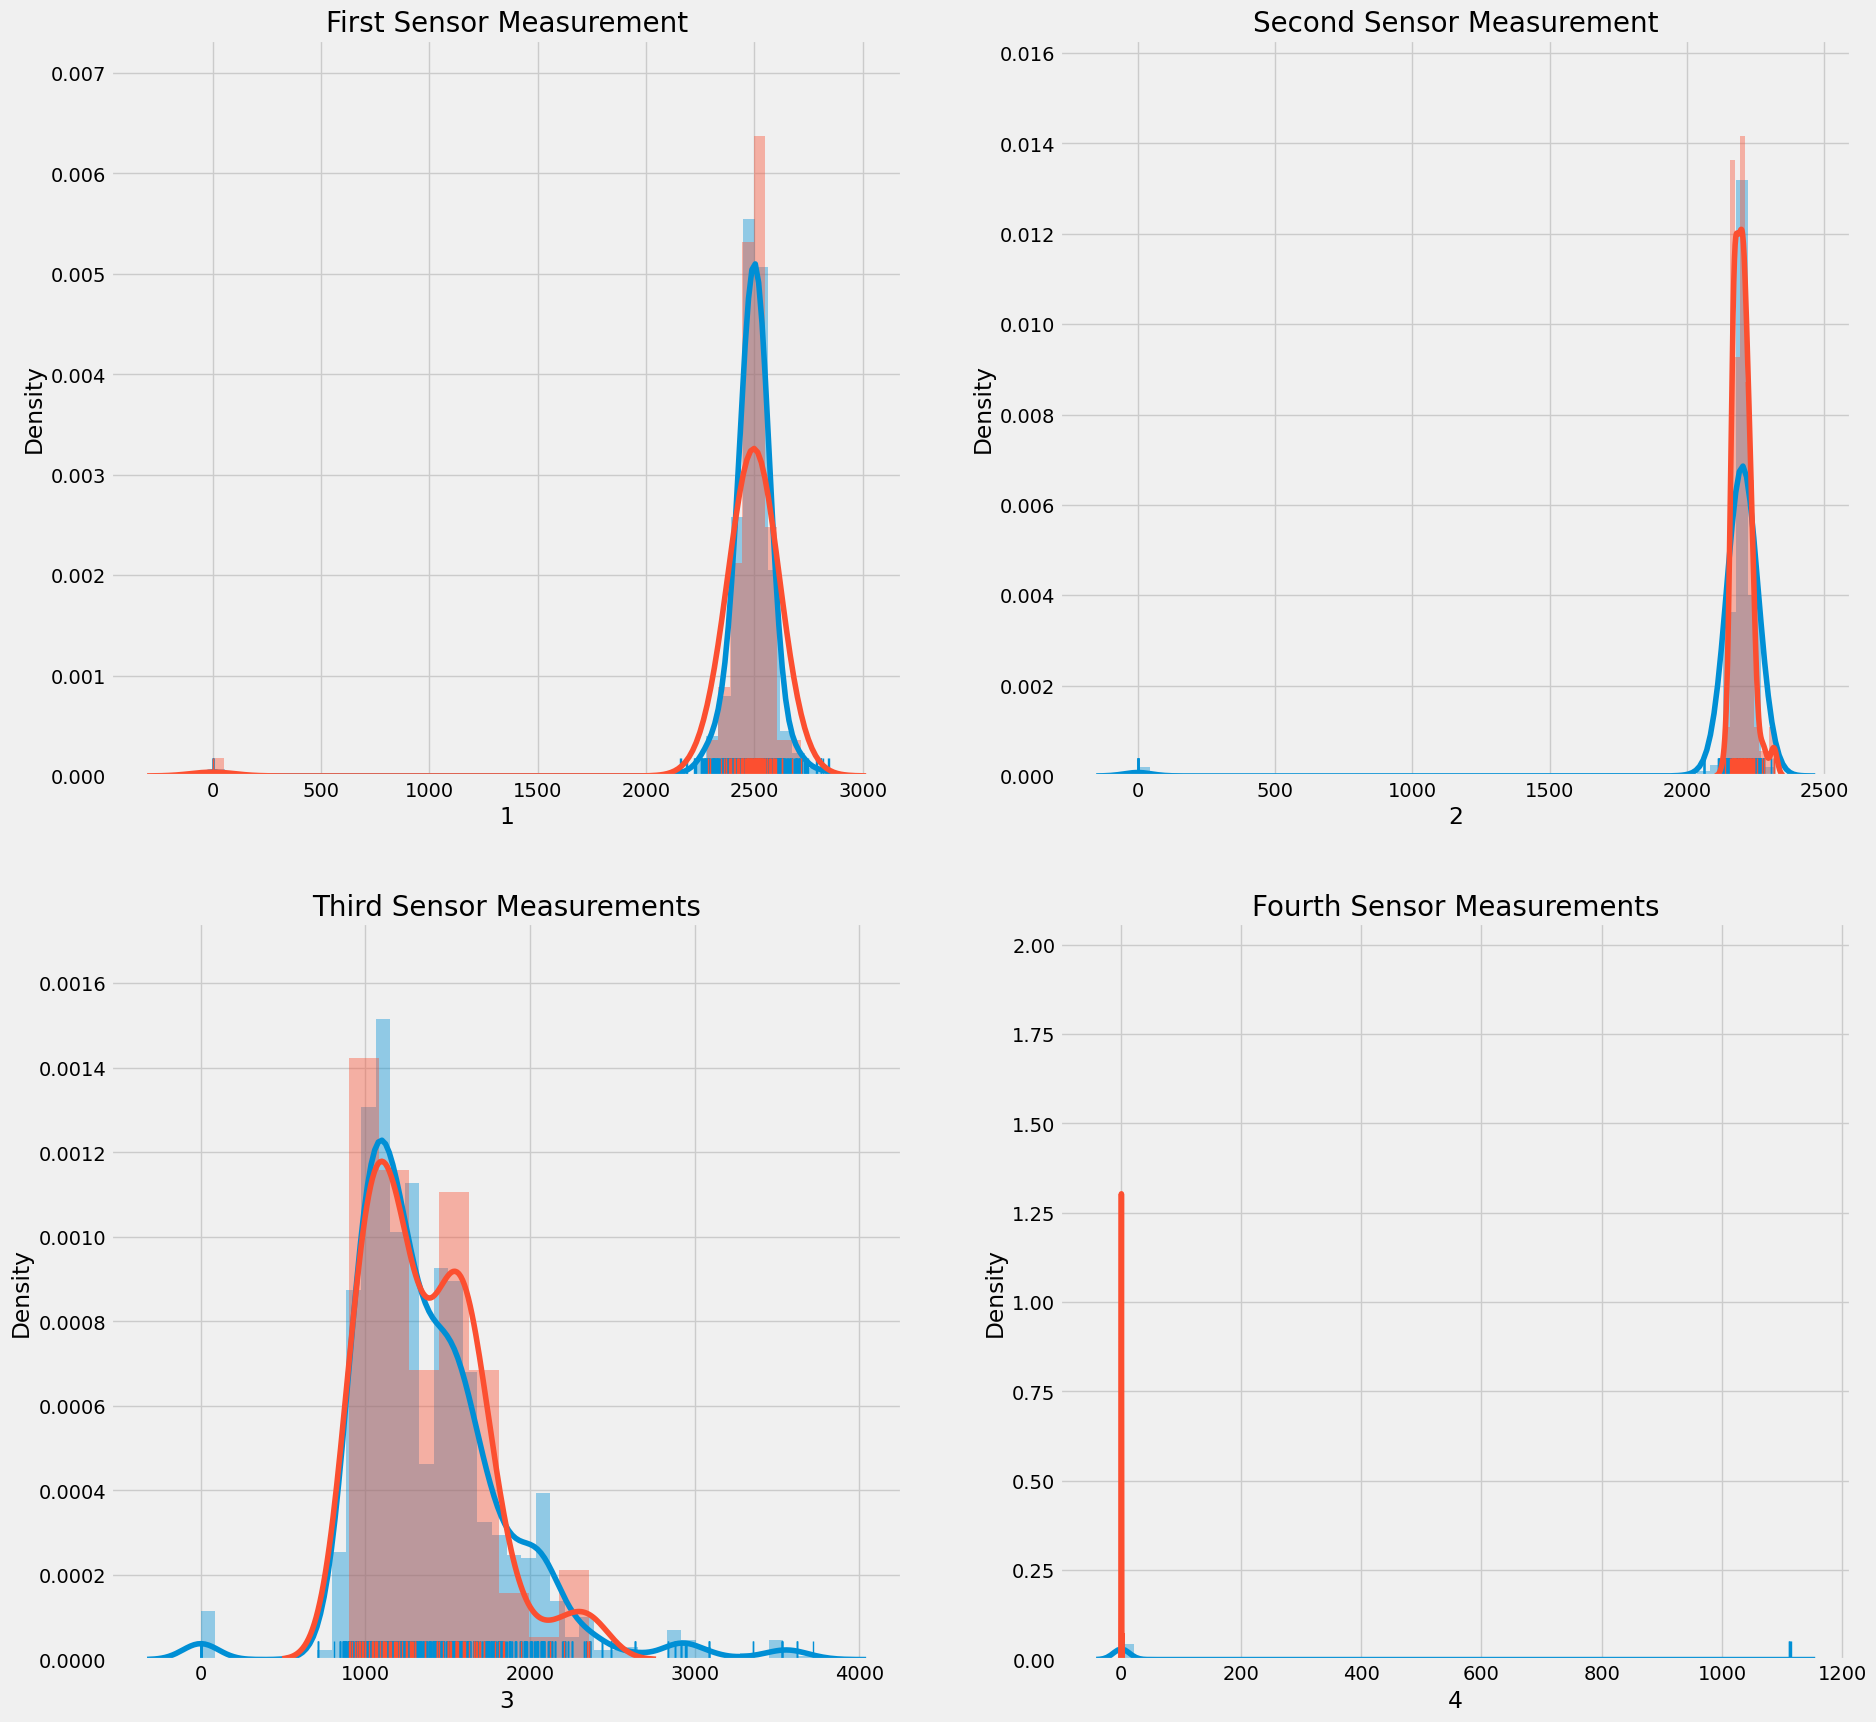

In [49]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurement', fontsize=20)


plt.subplot(2,2,2)
for target in targets:
    sns.distplot(target['2'], hist=True,rug=True)
plt.title('Second Sensor Measurement', fontsize=20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)